In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()
%matplotlib inline

In [48]:
data=pd.read_csv("/kaggle/input/superstore-sales-dataset/SuperStoreOrders.csv")

In [49]:
data.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [50]:
df=data.copy()

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

In [52]:
df['segment'].value_counts() #max sales

Consumer       26518
Corporate      15429
Home Office     9343
Name: segment, dtype: int64

<AxesSubplot:xlabel='segment', ylabel='count'>

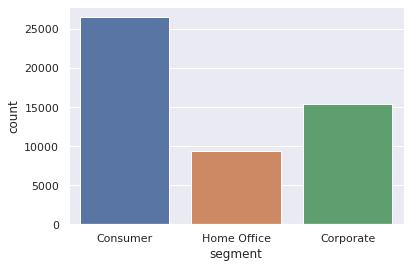

In [53]:
sns.countplot(x=df['segment'])

In [54]:
df['region'].value_counts() #region wise order count

Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       2048
Caribbean          1690
Canada              384
Name: region, dtype: int64

<AxesSubplot:xlabel='region', ylabel='count'>

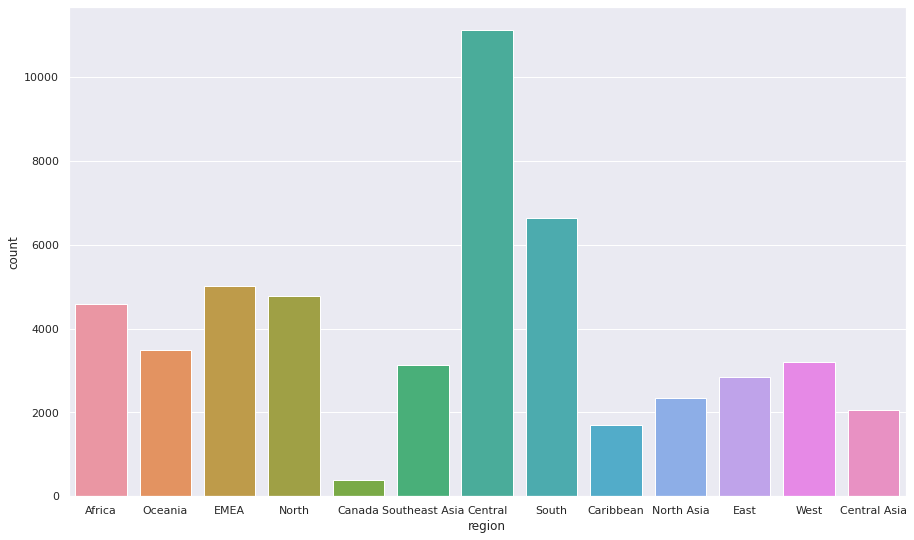

In [55]:
sns.set(rc={'figure.figsize':(15,9)})
sns.countplot(x=df['region'])               #we had to develop our sales in canada region 

In [56]:
df['customer_name'].value_counts()

Muhammed Yedwab        108
Steven Ward            106
Patrick O'Brill        102
Bill Eplett            102
Gary Hwang             102
                      ... 
Catherine Glotzbach     35
David Bremer            34
Nicole Brennan          31
Darren Budd             31
Michael Oakman          29
Name: customer_name, Length: 795, dtype: int64

<AxesSubplot:title={'center':'customer_name & product ordred'}>

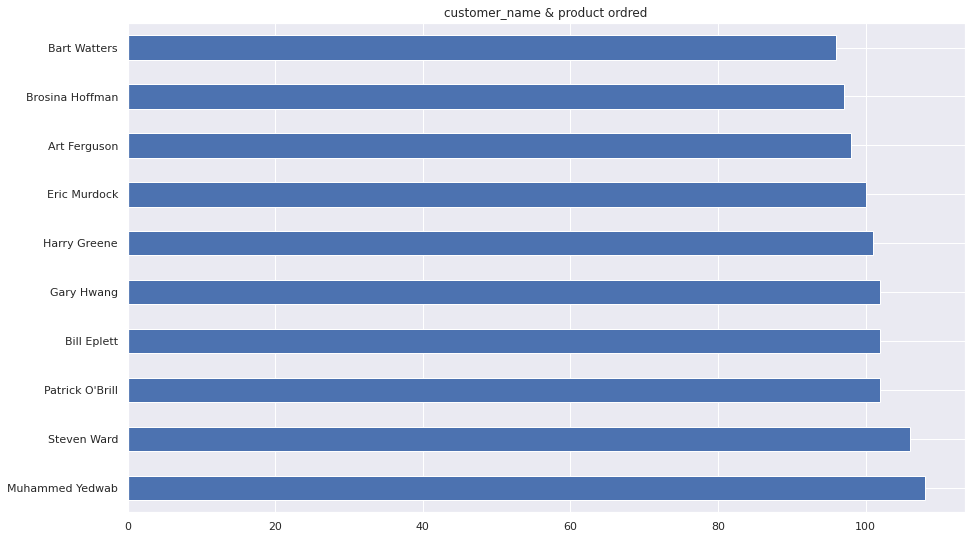

In [57]:
#top 10 customer
df['customer_name'].value_counts()[:10].plot(kind='barh',title='customer_name & product ordred')


In [58]:
customers = list(df['customer_name'].value_counts()[:10].index)
filters = df['customer_name'].isin(customers)
A = df[filters]

In [59]:
colors = sns.color_palette('pastel')[0:]


values = A.groupby('customer_name')['profit'].sum()
values                                                #one customer is in negative

customer_name
Art Ferguson       2278.30370
Bart Watters       3595.88590
Bill Eplett        7410.00530
Brosina Hoffman    4876.93980
Eric Murdock       3306.01548
Gary Hwang         3908.11510
Harry Greene       -291.49228
Muhammed Yedwab    2642.65408
Patrick O'Brill    3778.36370
Steven Ward        2794.73160
Name: profit, dtype: float64

In [60]:
A = A[A['customer_name'] != 'Harry Greene']


In [61]:
del customers[-2]

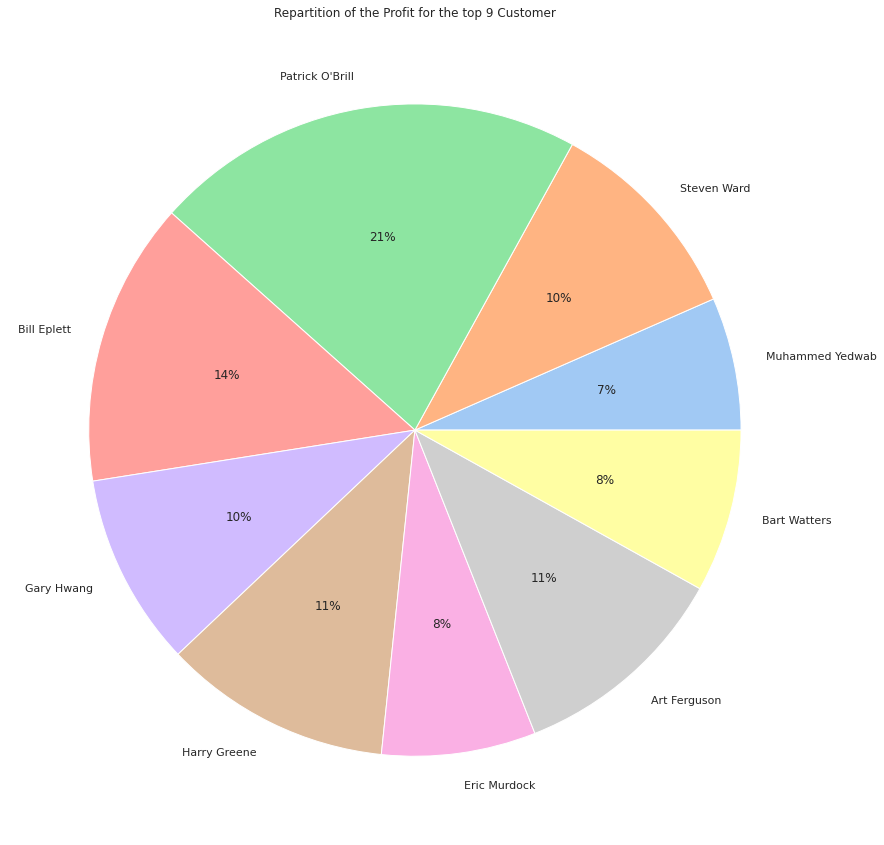

In [62]:
plt.figure(figsize=(15,15))
values = A.groupby('customer_name')['profit'].sum()

plt.pie(values, labels = customers, colors = colors, autopct='%.0f%%')
plt.title("Repartition of the Profit for the top 9 Customer")
plt.show()

Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables          861
Name: sub_category, dtype: int64


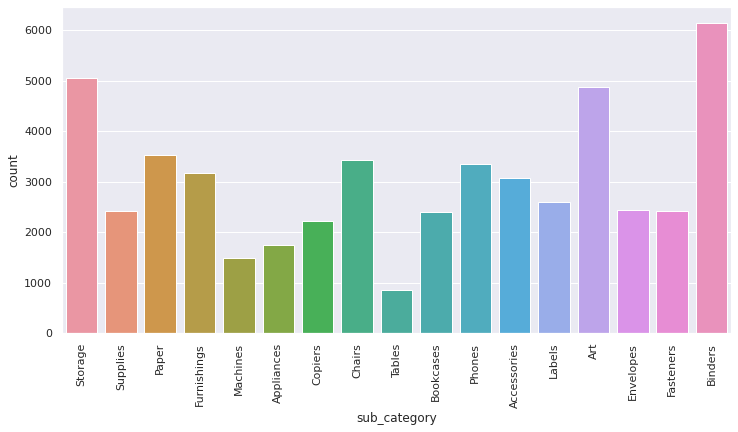

In [63]:
print(df['sub_category'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(x=df['sub_category'])
plt.xticks(rotation=90)                  #xticks used making x-axis text rotation, pie chart profit by customer
plt.show()                                

In [64]:
df['state'].value_counts().head(10)    #top ten 10 states by order counts

California                2001
England                   1499
New York                  1128
Texas                      985
Ile-de-France              981
New South Wales            781
North Rhine-Westphalia     719
Queensland                 717
San Salvador               615
Pennsylvania               587
Name: state, dtype: int64

<AxesSubplot:ylabel='state'>

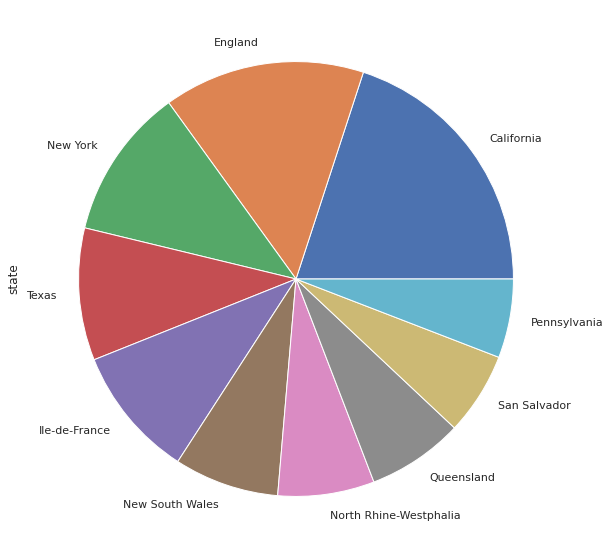

In [65]:
plt.figure(figsize=(15,10))
df['state'].value_counts().head(10).plot.pie()

In [66]:
df['country'].unique()

array(['Algeria', 'Australia', 'Hungary', 'Sweden', 'Canada',
       'New Zealand', 'Iraq', 'Philippines', 'United Kingdom', 'Malaysia',
       'Guatemala', 'Iran', 'Thailand', 'Tanzania', 'Brazil', 'Mexico',
       'Cuba', 'France', 'United States', 'Japan', 'Sudan', 'Taiwan',
       'Indonesia', 'Vietnam', 'Angola', 'China', 'Mozambique', 'Lebanon',
       'Singapore', 'Netherlands', 'Nigeria', 'Egypt', 'Venezuela',
       'South Africa', 'Spain', 'India', 'Turkey', 'Austria', 'Italy',
       'Germany', 'Nicaragua', 'Dominican Republic', 'El Salvador',
       'Denmark', 'Saudi Arabia', 'Zambia', 'Myanmar (Burma)', 'Russia',
       'Mongolia', 'Belgium', 'Kenya', 'Colombia', 'Estonia',
       'Madagascar', 'Portugal', 'Morocco', 'Sierra Leone', 'Norway',
       'Central African Republic', 'Czech Republic', 'Benin',
       'Bangladesh', 'Panama', 'Chile', 'South Korea', 'Switzerland',
       'Moldova', 'Uganda', 'Zimbabwe', 'Niger', 'Senegal', 'Hong Kong',
       'Democratic Republic o

In [67]:
df['country'].value_counts()[:10]    #top 10 countries

United States     9994
Australia         2837
France            2827
Mexico            2644
Germany           2065
China             1880
United Kingdom    1633
Brazil            1599
India             1555
Indonesia         1390
Name: country, dtype: int64

Text(0, 0.5, 'countries')

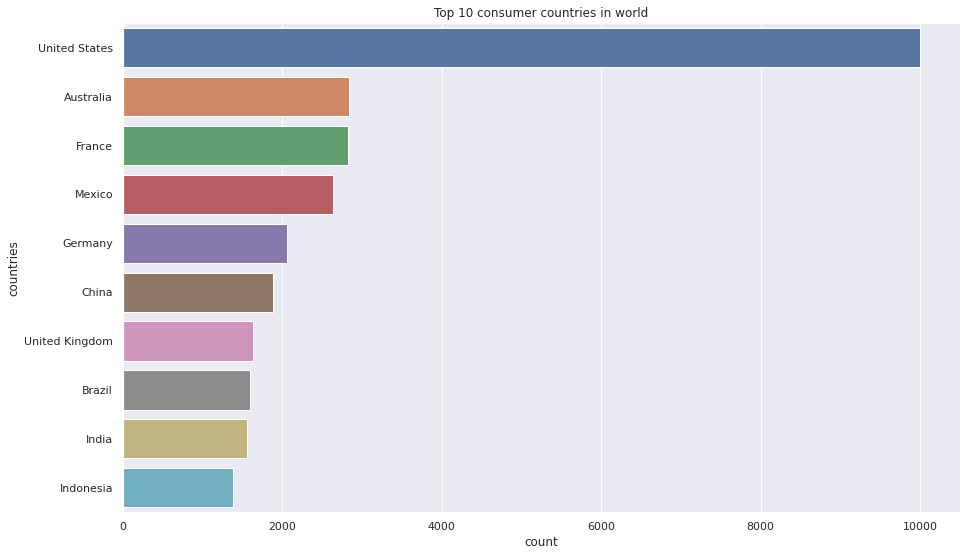

In [68]:
L1=["United States","Australia","France","Mexico","Germany","China","United Kingdom","Brazil","India","Indonesia"]
L2=[9994,2837,2827,2644,2065,1880,1633,1599,1555,1390]
sns.barplot(x=L2,y=L1)
sns.set_theme(style="darkgrid")
plt.title("Top 10 consumer countries in world")
plt.xlabel("count")
plt.ylabel("countries")

In [69]:

df_US=df[df["country"]=="United States"]
df_Aus=df[df["country"]=="Australia"]
df_FR=df[df["country"]=="France"]

<AxesSubplot:title={'center':'United States'}, xlabel='segment', ylabel='count'>

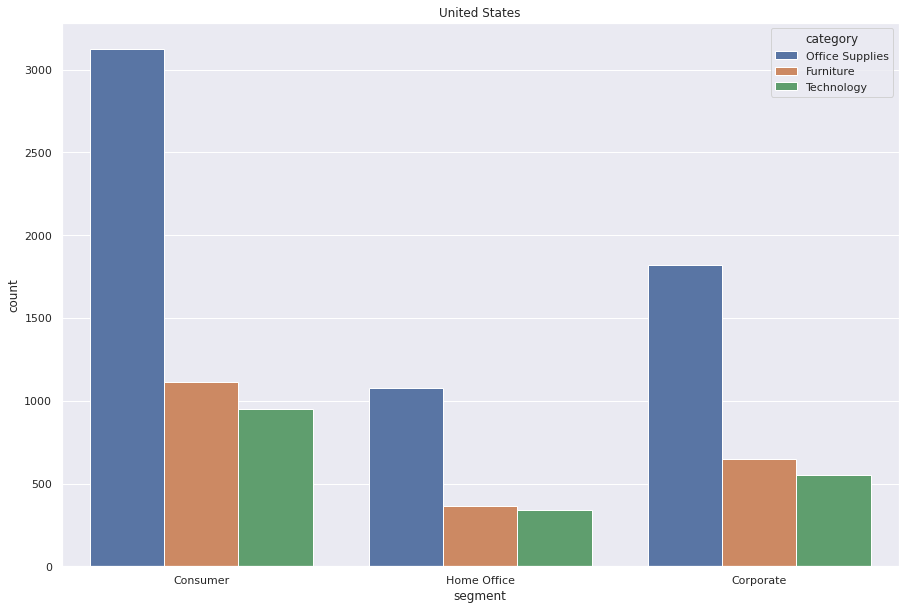

In [70]:
plt.figure(figsize=(15,10))
plt.title("United States")
sns.set_theme(style="darkgrid")
sns.countplot(x=df_US["segment"],hue=df_US["category"])

<AxesSubplot:title={'center':'Australia'}, xlabel='segment', ylabel='count'>

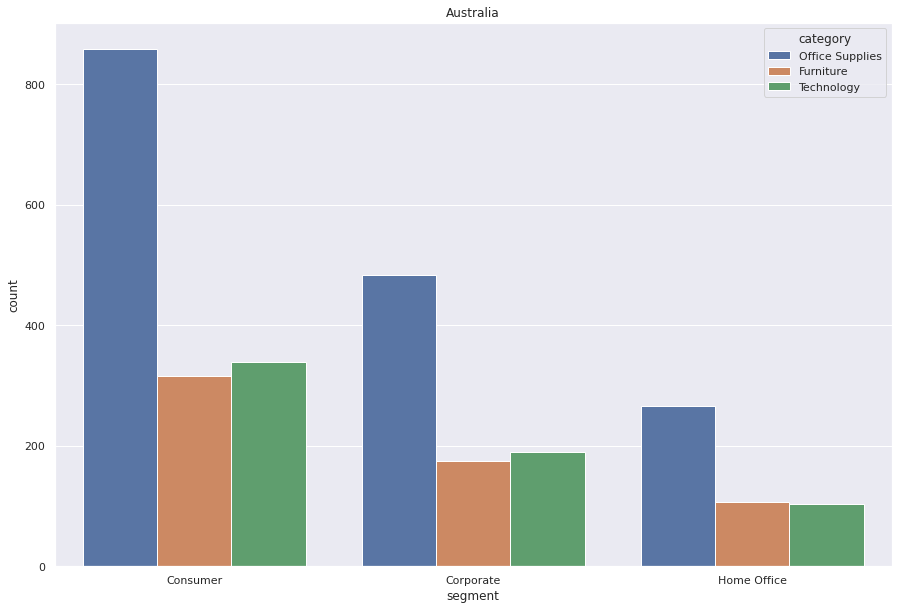

In [71]:
plt.figure(figsize=(15,10))
plt.title("Australia")
sns.set_theme(style="darkgrid")
sns.countplot(x=df_Aus["segment"],hue=df_Aus["category"])

<AxesSubplot:title={'center':'France'}, xlabel='segment', ylabel='count'>

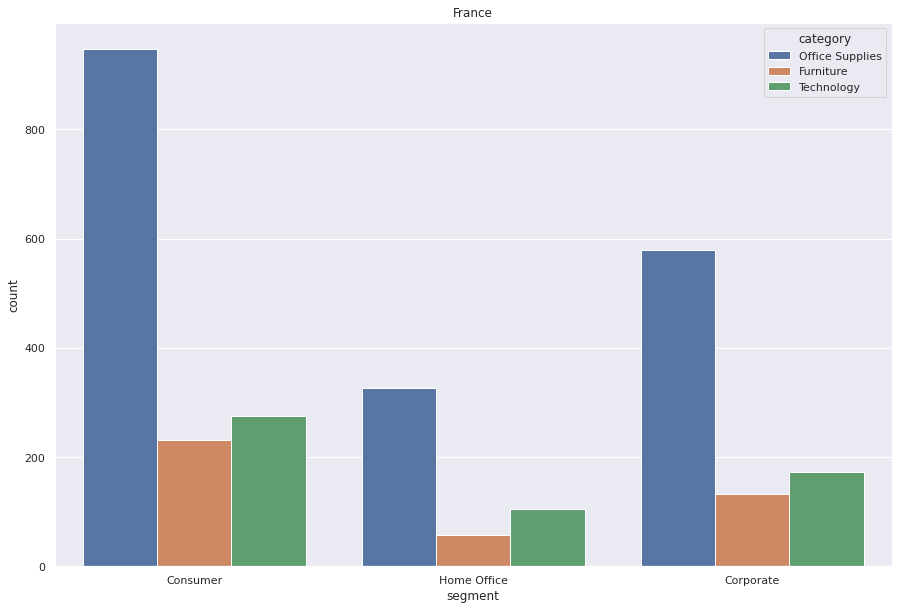

In [72]:
plt.figure(figsize=(15,10))
plt.title("France")
sns.set_theme(style="darkgrid")
sns.countplot(x=df_FR["segment"],hue=df_FR["category"])

<AxesSubplot:title={'center':'United States'}, xlabel='category', ylabel='count'>

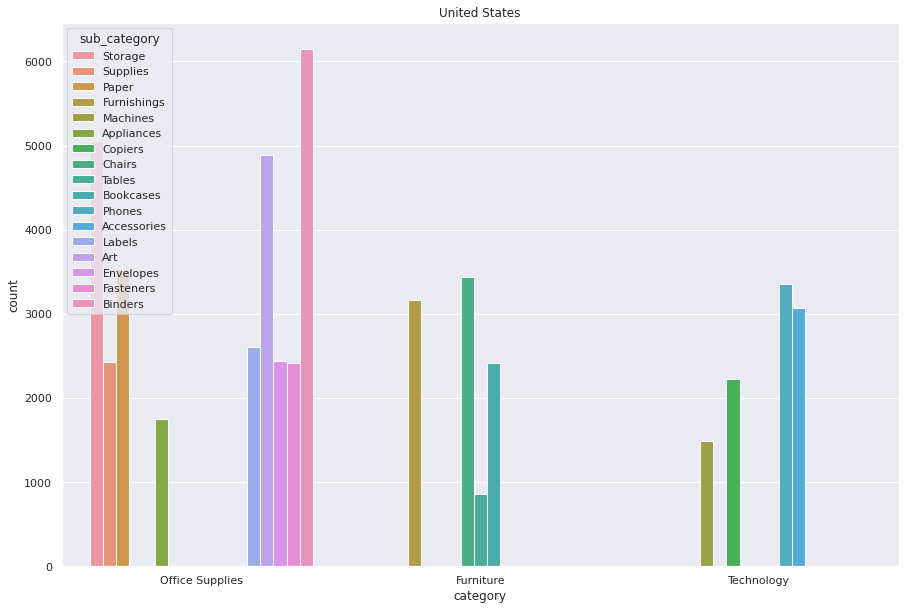

In [73]:
plt.figure(figsize=(15,10))
plt.title("United States")
sns.set_theme(style="darkgrid")
sns.countplot(x=df["category"],hue=df["sub_category"])

<AxesSubplot:title={'center':'Australia'}, xlabel='category', ylabel='count'>

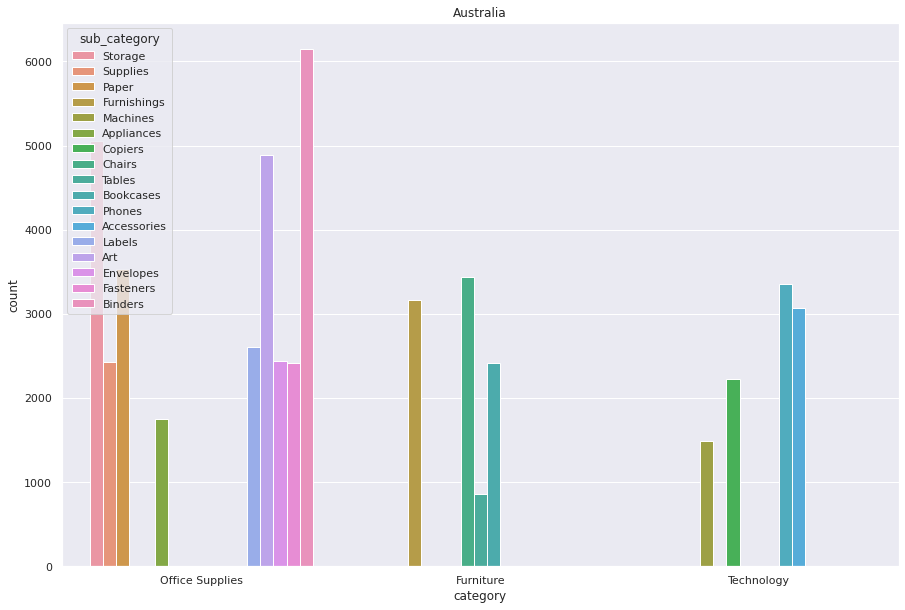

In [74]:
plt.figure(figsize=(15,10))
plt.title("Australia")
sns.set_theme(style="darkgrid")
sns.countplot(x=df["category"],hue=df["sub_category"])

<AxesSubplot:title={'center':'France'}, xlabel='category', ylabel='count'>

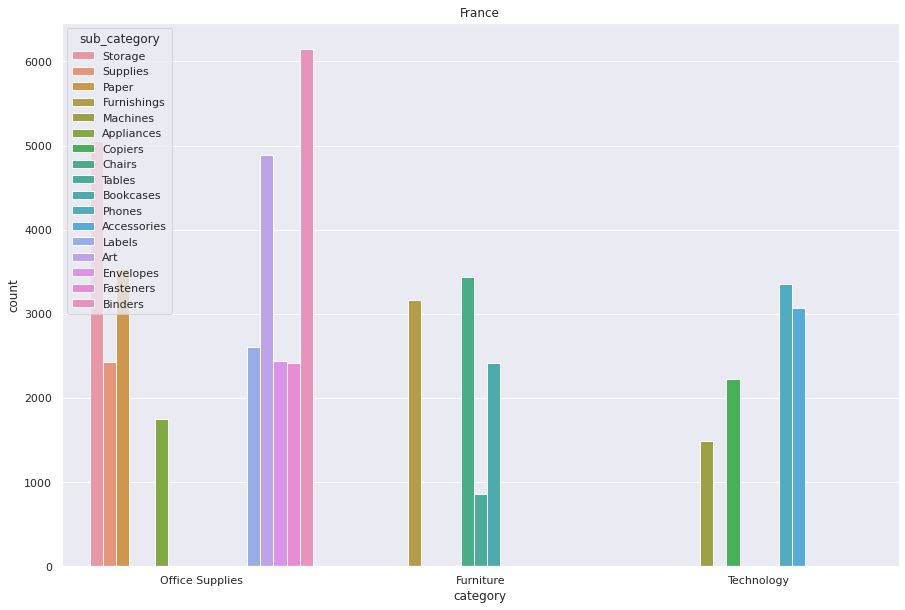

In [75]:
plt.figure(figsize=(15,10))
plt.title("France")
sns.set_theme(style="darkgrid")
sns.countplot(x=df["category"],hue=df["sub_category"])

In [76]:
df["year"].unique()

array([2011, 2012, 2013, 2014])

In [77]:
df["year"].value_counts()

2014    17531
2013    13799
2012    10962
2011     8998
Name: year, dtype: int64

In [78]:
df_1=df.sort_values(by=["year"],ascending=True)

In [79]:
df_2011=df_1[df_1["year"]==2011]
df_2011["quantity"].sum()

31443

In [80]:
df_2012=df_1[df_1["year"]==2012]
df_2012["quantity"].sum()

38111

In [81]:
df_2013=df_1[df_1["year"]==2013]
df_2013["quantity"].sum()

48136

In [82]:
df_2014=df_1[df_1["year"]==2014]
df_2014["quantity"].sum()

60622

Text(0.5, 1.0, 'Year wise growth')

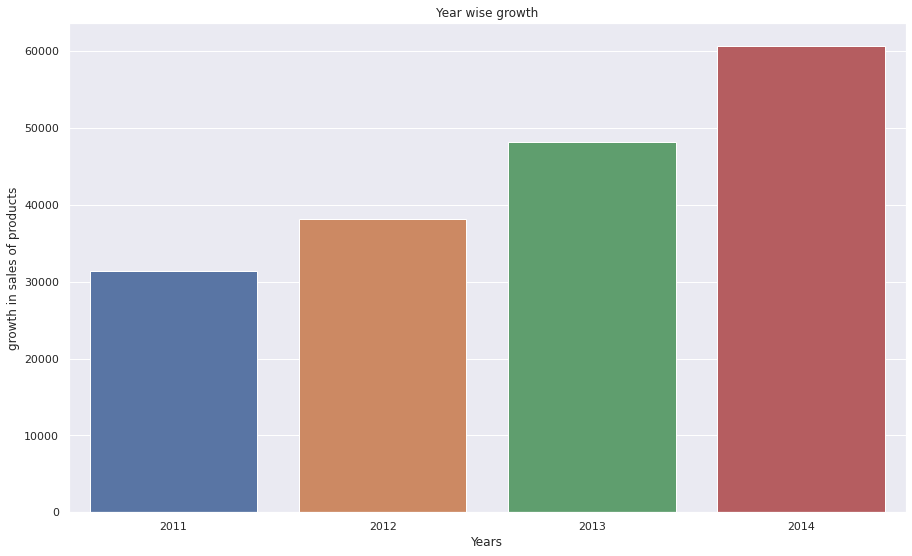

In [83]:
S1=[2011,2012,2013,2014]
S2=[31443,38111,48136,60622]
sns.barplot(x=S1,y=S2)
plt.xlabel("Years")
plt.ylabel("growth in sales of products")
plt.title("Year wise growth")

In [84]:
df["category"].unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

Text(0, 0.5, 'In millions')

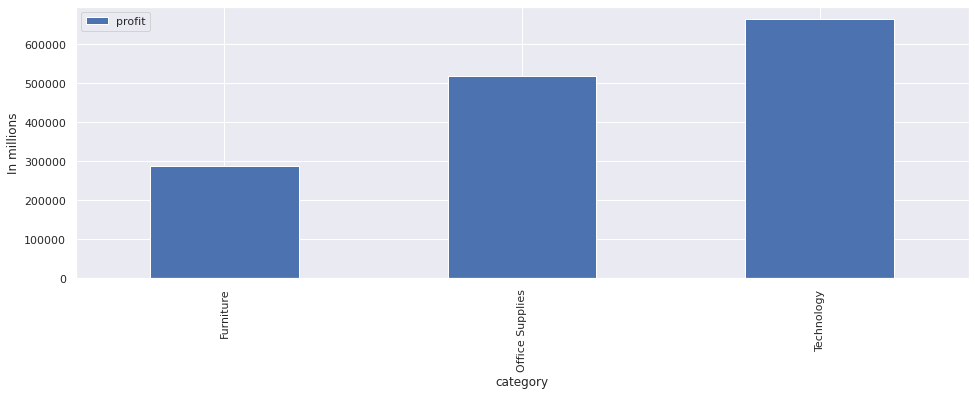

In [85]:
categorical_profits = df.groupby('category').sum()[['profit']]
categorical_profits.plot(kind='bar',figsize=(16,5))
plt.ylabel("In millions")

Text(0, 0.5, 'In millions')

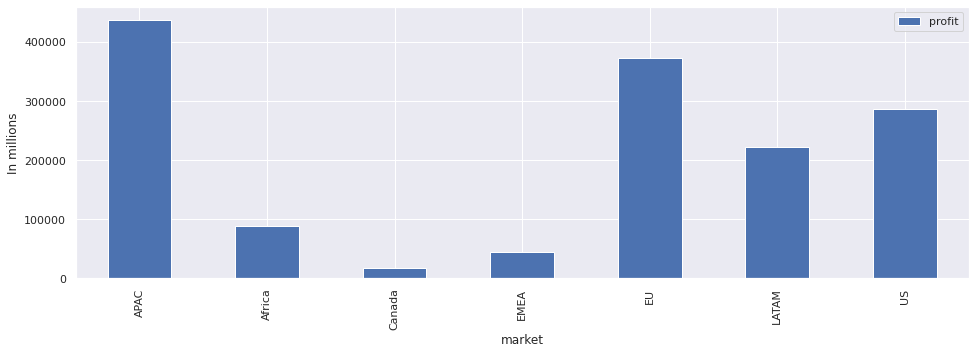

In [86]:
market_profits = df.groupby('market').sum()[['profit']]
market_profits.plot(kind='bar',figsize=(16,5))
plt.ylabel("In millions")

In [87]:
df['market']

0        Africa
1          APAC
2          EMEA
3            EU
4          APAC
          ...  
51285        US
51286    Africa
51287     LATAM
51288     LATAM
51289        US
Name: market, Length: 51290, dtype: object

In [88]:
product=pd.DataFrame(df.groupby(['product_name']).sum()['quantity'])
product.sort_values('quantity',ascending=False)[:10]

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


In [89]:
df['ship_mode'].value_counts()

Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: ship_mode, dtype: int64

<AxesSubplot:ylabel='ship_mode'>

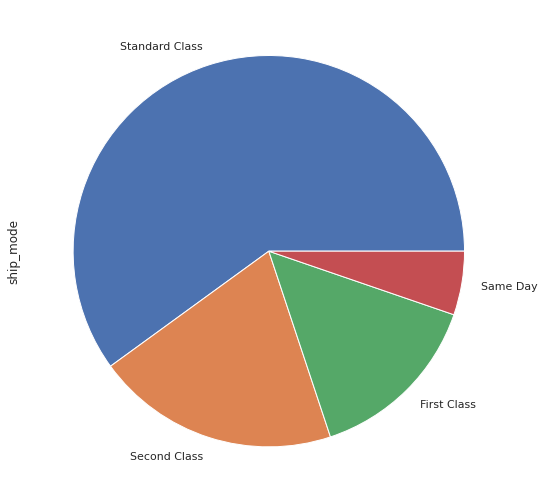

In [90]:
df['ship_mode'].value_counts().plot.pie()

In [94]:
df_profit=df[df['profit'] > 0]

In [103]:
df_loss=df[df['profit'] < 0]

In [101]:
df_profit.shape

(38079, 21)

In [104]:
df_loss.shape

(12543, 21)

In [105]:
Total_Profit = df_profit['profit'].sum()
print(Total_Profit)                               #total profit

2389392.212


In [106]:
Total_loss=np.negative(df_loss['profit'].sum())
print("Total_loss = %.2f" %Total_loss)          #total loss

Total_loss = 920357.39


In [107]:
Net_Profit = Total_Profit - Total_loss
print(Net_Profit)                      #net profit

1469034.8212799998


In [110]:
df_Net_Profit=pd.DataFrame({'Total_Profit': {0: 2389392},
                            'Total_loss':{0: 920357},
                            '         ':{0: '='},
                            'Net_Profit':{0: 1469035}})

In [112]:
df_Net_Profit

,Total_Profit,Total_loss,,Net_Profit
0,2389392,920357,=,1469035


<AxesSubplot:>

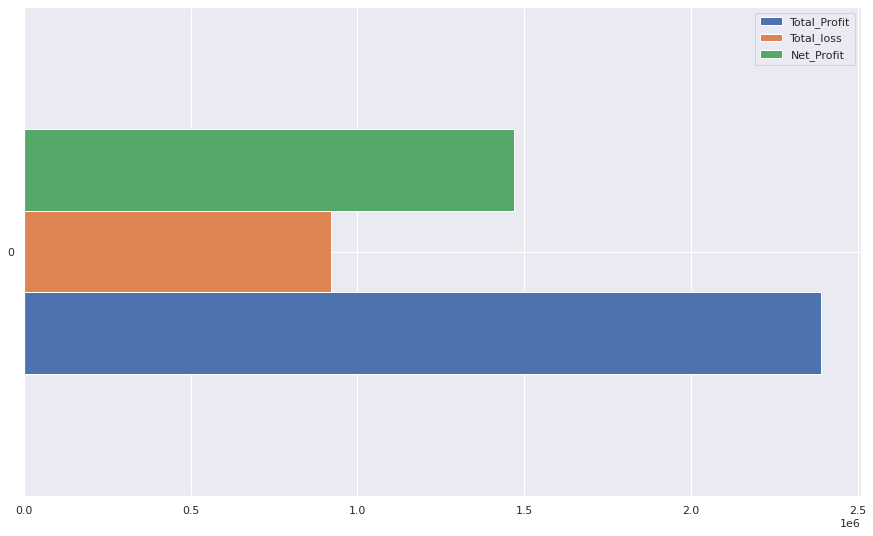

In [113]:
df_Net_Profit.plot(kind='barh')